In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [7]:
data_no_ema = '../data/no-ema/pythia_ellen.jsonl'
sizes = [
        "pythia-70m-deduped", "pythia-160m-deduped",
        "pythia-410m-deduped", "pythia-1b-deduped",
        "pythia-1.4b-deduped", "pythia-2.8b-deduped",
        "pythia-6.9b-deduped", "pythia-12b-deduped"
    ]
ppl_df = pd.read_json(data_no_ema, lines=True)
for size in sizes:
    res = scipy.stats.spearmanr(ppl_df[f"{size}_ppl"], ppl_df['disorganization_subscale'])
    print(f"{size}\nSpearman rho: {res[0]:.3f}\tp-value: {res[1]:.3f}")

pythia-70m-deduped
Spearman rho: 0.276	p-value: 0.089
pythia-160m-deduped
Spearman rho: 0.258	p-value: 0.112
pythia-410m-deduped
Spearman rho: 0.264	p-value: 0.104
pythia-1b-deduped
Spearman rho: 0.256	p-value: 0.116
pythia-1.4b-deduped
Spearman rho: 0.296	p-value: 0.067
pythia-2.8b-deduped
Spearman rho: 0.280	p-value: 0.084
pythia-6.9b-deduped
Spearman rho: 0.274	p-value: 0.091
pythia-12b-deduped
Spearman rho: 0.306	p-value: 0.058


In [5]:
def plot_global_ppl(df):
    plt.figure(figsize=(16,8))
    ppl_columns = [col for col in df.columns if col.endswith("_ppl")]
    df_long = pd.melt(df, 
                      id_vars=['disorganization_subscale'],
                      value_vars=ppl_columns,
                      var_name='Model Size',
                      value_name='Perplexity')
    df_long['Model Size'] = df_long['Model Size'].str.split("_").str[0]
    sns.lineplot(data=df_long,
                x='disorganization_subscale',
                y='Perplexity',
                hue='Model Size',
                style='Model Size',
                markers=True,
                dashes=False,
                errorbar=('ci', 95),
                )
    plt.xlabel('Modified PANSS', fontsize=20)
    plt.ylabel('Perplexity', fontsize=20)
    plt.legend(title='Model Size', bbox_to_anchor=(0.85, 1), loc='upper left',
               fontsize=18, title_fontsize=20)
    plt.tight_layout()
    return plt

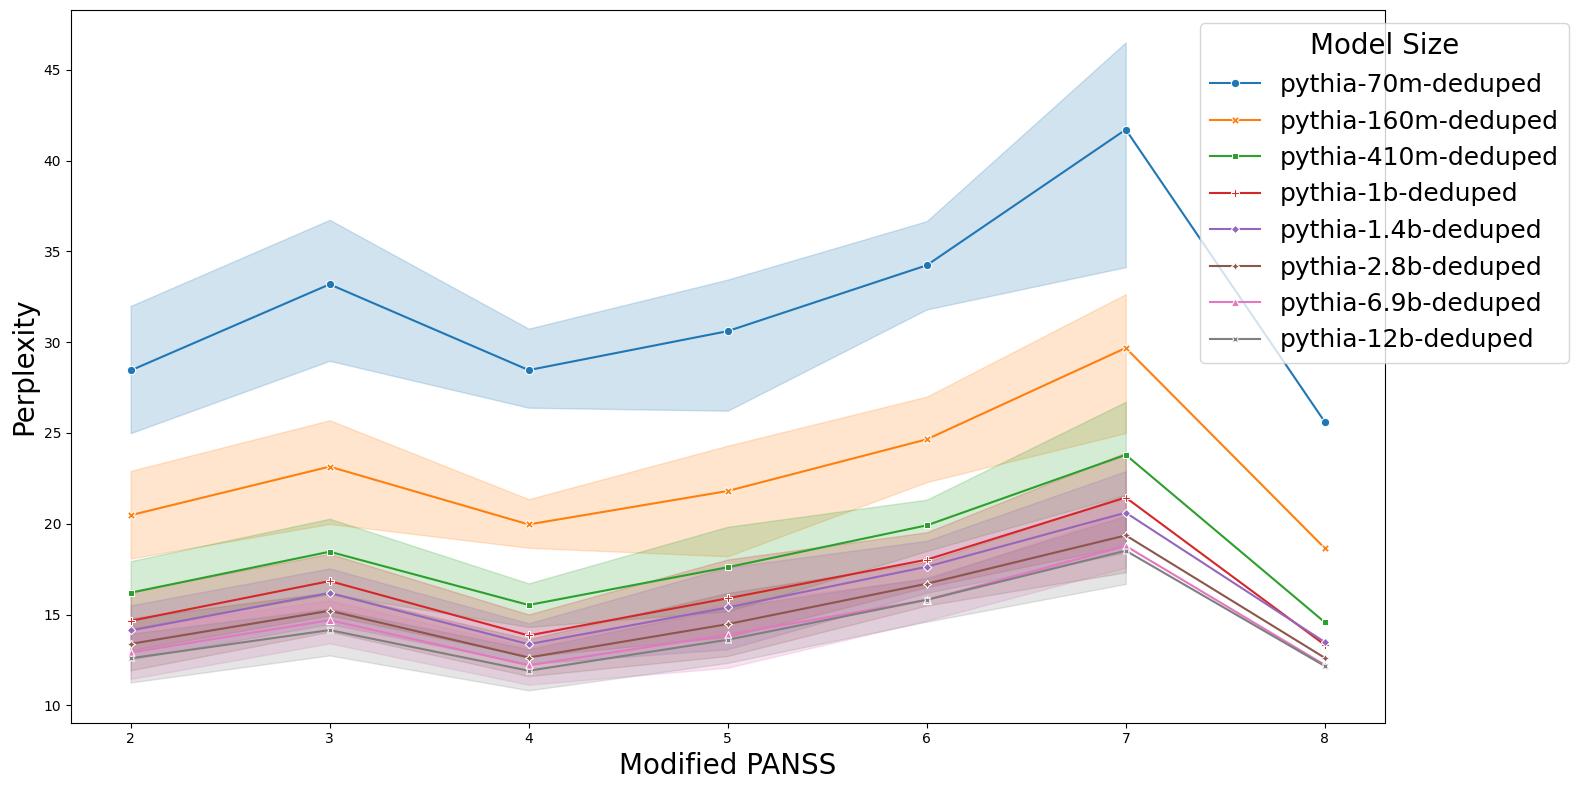

In [6]:
plot = plot_global_ppl(ppl_df)
# plot.show()
plot.savefig("../figs/global_ppl_ellen.pdf", dpi=300)